## Iris Dataset Clustering using k-Means and Classification using kNN

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
features, target = make_classification(n_samples=15000, n_features=4, n_informative=4, n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=0)
feature_names = ["0", "1", "2", "3"]

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=2, shuffle=True)

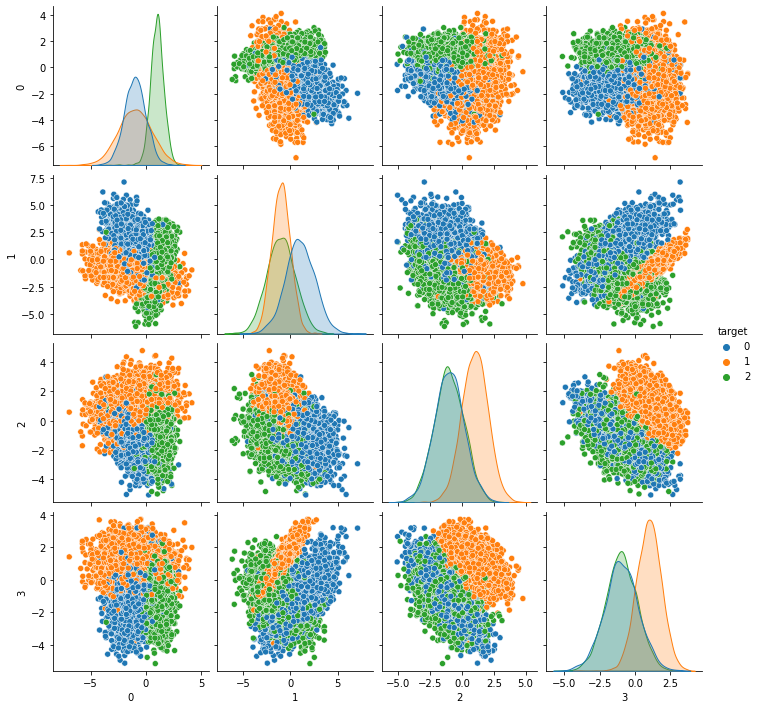

In [3]:
df_feature = pd.DataFrame(x_train, columns=feature_names)
df_target = pd.DataFrame(y_train, columns=["target"])

df = pd.concat([df_feature, df_target], axis=1)

sns.pairplot(df, hue="target", palette="tab10")
plt.show()

In [4]:
k = 3

k_means = KMeans(n_clusters=k, random_state=3)
k_means.fit(x_train, y_train)

centers = k_means.cluster_centers_
centers_label = [0, 1, 2]
labels = k_means.labels_
centers_label_name = [3, 3, 3]

features_cluster = np.concatenate([x_train, centers], axis=0)
labels_cluster = np.concatenate([labels, centers_label_name], axis=0)

score = metrics.accuracy_score(y_train, k_means.labels_)

print(features_cluster.shape)
print(labels_cluster.shape)
print("-----" * 10)
print("PC - Clustering Average Accuracy : %f" % score)

(12003, 4)
(12003,)
--------------------------------------------------
PC - Clustering Average Accuracy : 0.304333


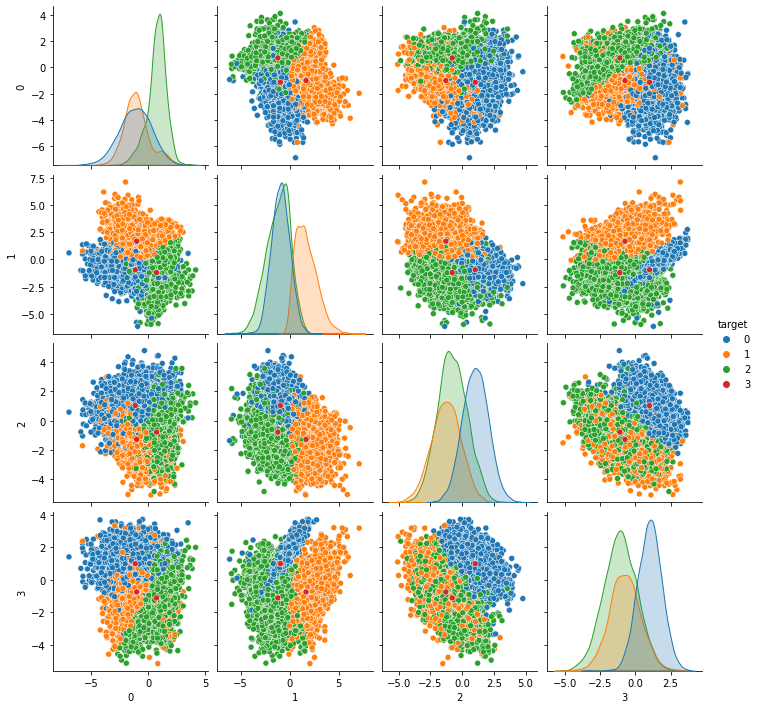

In [5]:
df_feature = pd.DataFrame(features_cluster, columns=feature_names)
df_target = pd.DataFrame(labels_cluster, columns=["target"])

df = pd.concat([df_feature, df_target], axis=1)

sns.pairplot(df, hue="target", palette="tab10")
plt.show()

In [6]:
comparison_acc = []
comparison_time = []

## kNN

In [7]:
# kNN
avg_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k_neighbors = 1

    knn = KNeighborsClassifier(k_neighbors, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_acc.append(test_score)
    avg_time.append(end)

mean_acc = np.array(avg_acc).mean()
mean_time = np.array(avg_time).mean()

comparison_acc.append(mean_acc)
comparison_time.append(mean_time)

print("PC - kNN Average Accuracy : %f" % mean_acc)
print("PC - kNN Classification Time : %.4f" % mean_time, "sec")

PC - kNN Average Accuracy : 0.941767
PC - kNN Classification Time : 0.0113 sec


## k-Means & kNN

In [8]:
# k-Means & kNN
avg_acc = []
avg_cluster_time = []
avg_classification_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k_cluster = 3

    start1 = time.perf_counter()
    k_means = KMeans(n_clusters=k_cluster, random_state=seed)
    k_means.fit(x_train, y_train)
    end1 = time.perf_counter() - start1

    centers = k_means.cluster_centers_
    labels = k_means.labels_
    centers_label = []

    for c in range(k_cluster):
        label_index = np.where(labels == c)
        idx = label_index[0]
        counter = Counter(y_train[idx])
        counter = dict(counter)
        label_list = list(counter)[0]
        centers_label.append(label_list)

    knn = KNeighborsClassifier(k_neighbors, weights='distance', n_jobs=-1)
    knn.fit(centers, centers_label)

    start2 = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end2 = time.perf_counter() - start2

    avg_acc.append(test_score)
    avg_cluster_time.append(end1)
    avg_classification_time.append(end2)

mean_acc = np.array(avg_acc).mean()
mean_cluster_time = np.array(avg_cluster_time).mean()
mean_classification_time = np.array(avg_classification_time).mean()

comparison_acc.append(mean_acc)
comparison_time.append(mean_cluster_time)
comparison_time.append(mean_classification_time)

print("PC - k-means & kNN Average Accuracy : %f" % mean_acc)
print("PC - Clustering Time : %.4f" % mean_cluster_time, "sec")
print("PC - Classification Time : %.4f" % mean_classification_time, "sec")
print("PC - Total Time : %.4f" % (mean_cluster_time + mean_classification_time), "sec")

PC - k-means & kNN Average Accuracy : 0.806267
PC - Clustering Time : 0.0774 sec
PC - Classification Time : 0.0062 sec
PC - Total Time : 0.0836 sec


## PCA Feature 3 & k-Means & kNN

In [9]:
# PCA feature 3 & k-means & kNN
features, target = make_classification(n_samples=15000, n_features=4, n_informative=4, n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=0)

pca = PCA(n_components=3)
features = pca.fit(features).transform(features)

avg_acc = []
avg_cluster_time = []
avg_classification_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k_cluster = 3

    start1 = time.perf_counter()
    k_means = KMeans(n_clusters=k_cluster, random_state=seed)
    k_means.fit(x_train, y_train)
    end1 = time.perf_counter() - start1

    centers = k_means.cluster_centers_
    labels = k_means.labels_
    centers_label = []

    for c in range(k_cluster):
        label_index = np.where(labels == c)
        idx = label_index[0]
        counter = Counter(y_train[idx])
        counter = dict(counter)
        label_list = list(counter)[0]
        centers_label.append(label_list)

    knn = KNeighborsClassifier(k_neighbors, weights='distance', n_jobs=-1)
    knn.fit(centers, centers_label)

    start2 = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end2 = time.perf_counter() - start2

    avg_acc.append(test_score)
    avg_cluster_time.append(end1)
    avg_classification_time.append(end2)

mean_acc = np.array(avg_acc).mean()
mean_cluster_time = np.array(avg_cluster_time).mean()
mean_classification_time = np.array(avg_classification_time).mean()

comparison_acc.append(mean_acc)
comparison_time.append(mean_cluster_time)
comparison_time.append(mean_classification_time)

print("PC - PCA feautre 3 & k-means & kNN Average Accuracy : %f" % mean_acc)
print("PC - Clustering Time : %.4f" % mean_cluster_time, "sec")
print("PC - Classification Time : %.4f" % mean_classification_time, "sec")
print("PC - Total Time : %.4f" % (mean_cluster_time + mean_classification_time), "sec")


PC - PCA feautre 3 & k-means & kNN Average Accuracy : 0.806367
PC - Clustering Time : 0.0792 sec
PC - Classification Time : 0.0063 sec
PC - Total Time : 0.0854 sec


## PCA Feature 2 & k-Means & kNN

In [10]:
# PCA feature 3 & k-means & kNN
features, target = make_classification(n_samples=15000, n_features=4, n_informative=4, n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=0)

pca = PCA(n_components=2)
features = pca.fit(features).transform(features)

avg_acc = []
avg_cluster_time = []
avg_classification_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k_cluster = 3

    start1 = time.perf_counter()
    k_means = KMeans(n_clusters=k_cluster, random_state=seed)
    k_means.fit(x_train, y_train)
    end1 = time.perf_counter() - start1

    centers = k_means.cluster_centers_
    labels = k_means.labels_
    centers_label = []

    for c in range(k_cluster):
        label_index = np.where(labels == c)
        idx = label_index[0]
        counter = Counter(y_train[idx])
        counter = dict(counter)
        label_list = list(counter)[0]
        centers_label.append(label_list)

    knn = KNeighborsClassifier(k_neighbors, weights='distance', n_jobs=-1)
    knn.fit(centers, centers_label)

    start2 = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end2 = time.perf_counter() - start2

    avg_acc.append(test_score)
    avg_cluster_time.append(end1)
    avg_classification_time.append(end2)

mean_acc = np.array(avg_acc).mean()
mean_cluster_time = np.array(avg_cluster_time).mean()
mean_classification_time = np.array(avg_classification_time).mean()

comparison_acc.append(mean_acc)
comparison_time.append(mean_cluster_time)
comparison_time.append(mean_classification_time)

print("PC - PCA feautre 2 & k-means & kNN Average Accuracy : %f" % mean_acc)
print("PC - Clustering Time : %.4f" % mean_cluster_time, "sec")
print("PC - Classification Time : %.4f" % mean_classification_time, "sec")
print("PC - Total Time : %.4f" % (mean_cluster_time + mean_classification_time), "sec")


PC - PCA feautre 2 & k-means & kNN Average Accuracy : 0.727600
PC - Clustering Time : 0.0783 sec
PC - Classification Time : 0.0062 sec
PC - Total Time : 0.0845 sec


## Method Comparison

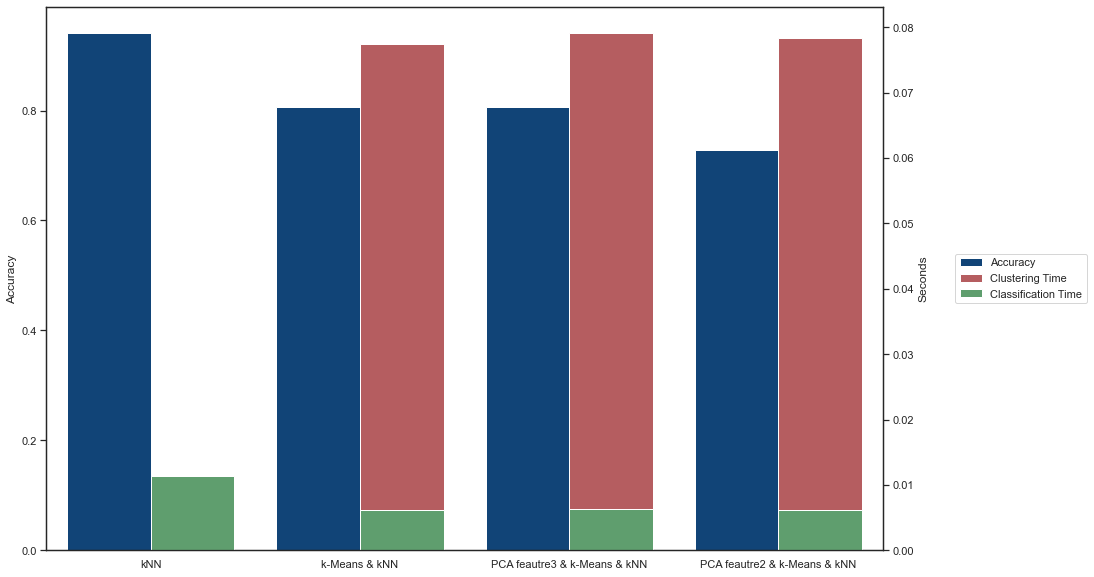

In [11]:
df_stack = pd.DataFrame(dict(
    score = [comparison_acc[0], comparison_acc[1], comparison_acc[2], comparison_acc[3]],
    cluster = [0, comparison_time[1], comparison_time[3], comparison_time[5]],
    classifier = [comparison_time[0], comparison_time[2], comparison_time[4], comparison_time[6]]
))

sns.set(style="white", rc={"lines.linewidth": 3})

fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()

sns.barplot(x=["kNN", "k-Means & kNN", "PCA feautre3 & k-Means & kNN", "PCA feautre2 & k-Means & kNN"],
            y="score",
            data=df_stack,
            label="Accuracy",
            color='#004488',
            ax=ax1)

sns.barplot(x=["kNN", "k-Means & kNN", "PCA feautre3 & k-Means & kNN", "PCA feautre2 & k-Means & kNN"], 
            y="cluster",
            data=df_stack,
            label="Clustering Time",
            color='r',
            ax=ax2)

sns.barplot(x=["kNN", "k-Means & kNN", "PCA feautre3 & k-Means & kNN", "PCA feautre2 & k-Means & kNN"], 
            y="classifier",
            data=df_stack,
            label="Classification Time",
            color='g',
            ax=ax2)

ax1.set_ylabel("Accuracy")
ax2.set_ylabel("Seconds")

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

width_scale = 0.5

for bar in ax1.containers[0]:
    bar.set_width(bar.get_width() * width_scale)

for bar_containers in ax2.containers:
    for bar in bar_containers:
        x = bar.get_x()
        w = bar.get_width()
        bar.set_x(x + w * (1- width_scale))
        bar.set_width(w * width_scale)

plt.legend(lines, labels, loc='center right', bbox_to_anchor=(1.25, 0.5))
plt.show()
sns.set()